#Decision Tree
It is Supervised Machine learning Model (Classification and Regression)
* Root node - It Represents my entire dataset
* Splitting - We split the data (Features) into internal nodes(By decision criteria)(Gini impurity,entropy and information gain)
* Leaf node - Terminal node (Target value) (purest form)
* These things goes into a recursion(function call itself until the condition satisfies)
* Predict

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* age - Patient age
* Sex - Gender 1 -> Male 0-> Female
* CP -> chest pain
* trestbps -> resting bloog pressure(in mm/hg)
* chol -> blood cholestrol level
* fbs -> Fasting blood sugar
* restecg -> heart activity while resting
* thalach -> Max heart rate while excercise
* exang -> Is there any pain during excercise
* oldpeak -> Electrical activities of heart
* slope -> 0 -> upslope , 1-> flat, 2 -> downslope
* ca -> whether in vessels there are blockage or vessels is being narrow down or not
* Thal -> Thallium test (Permanent damage or healthy heart)
* Target -> Heart disease present or not

##**EDA**

**shape insights**

In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Insights**
* There is no null values
* all columns are numeric value

In [5]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
df.drop_duplicates(inplace=True)
# df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df['target'].value_counts()


,count
target,
1,164
0,138


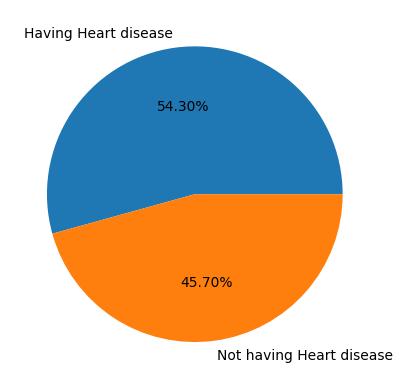

In [11]:
plt.pie(df['target'].value_counts(),autopct = '%0.2f%%', labels = ['Having Heart disease','Not having Heart disease'])
plt.show()

In [12]:
# Cholestrol
df[df['chol']>300].shape

(43, 14)

In [13]:
# High cholestrol and age greater than 40
df[(df['chol']>300) & (df['age']>40)].shape

(42, 14)

**Let's see which column is correlated with my target**

In [15]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


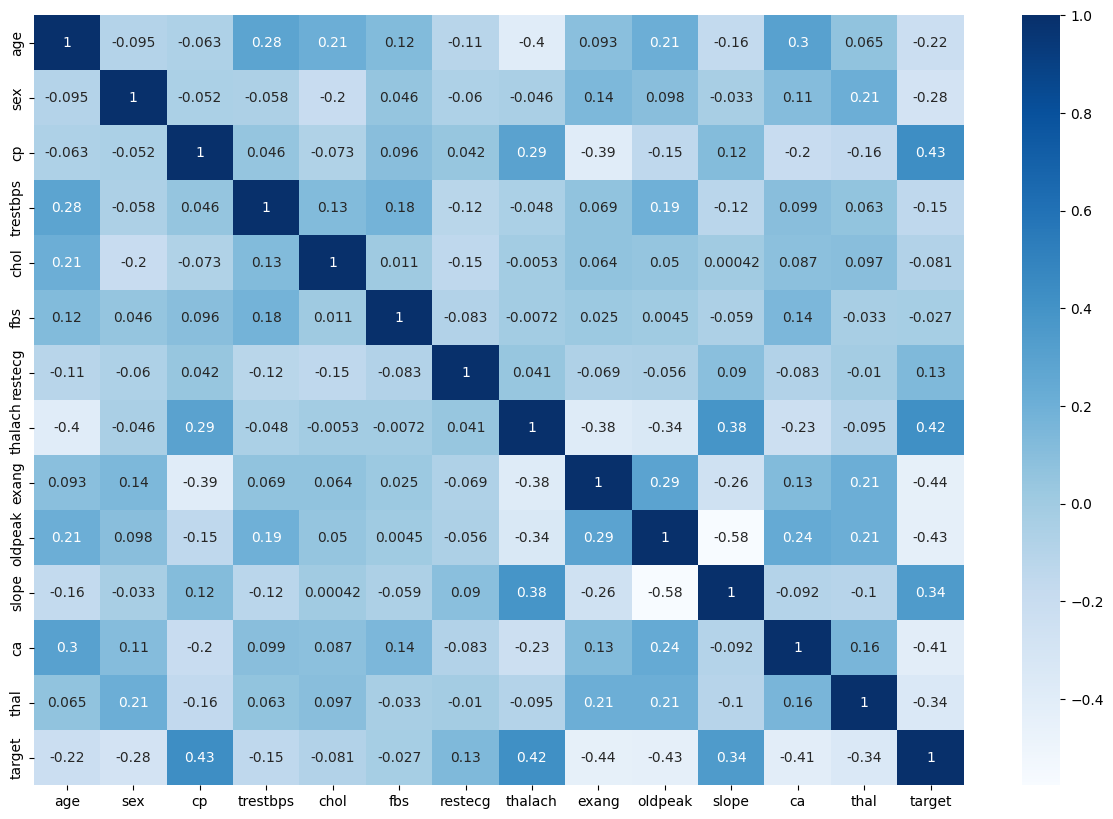

In [16]:
#Correlation graph
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True,cmap ='Blues')
plt.show()

**Insights**
* CP - +0.43 -> Chest pain type is positively related to disease present.
* thalach -> 0.42 -> Higher the max heart rate, the more like to have a condition

**statistical summary**

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [18]:
df.age.median()

55.5

<Axes: xlabel='age', ylabel='Count'>

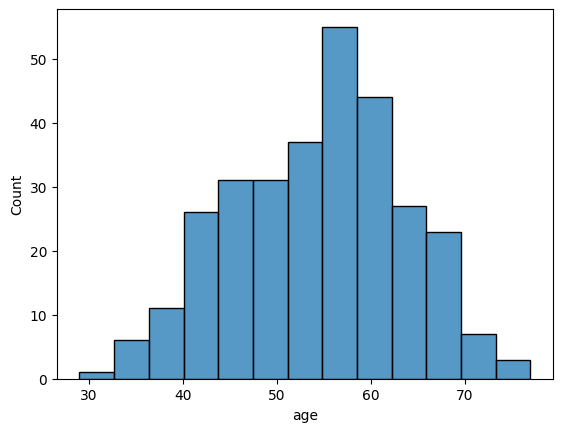

In [19]:
sns.histplot(df['age'])

/tmp/ipython-input-3513824752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==1]['age'],label='Male')
/tmp/ipython-input-3513824752.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==0]['age'],label='Female')


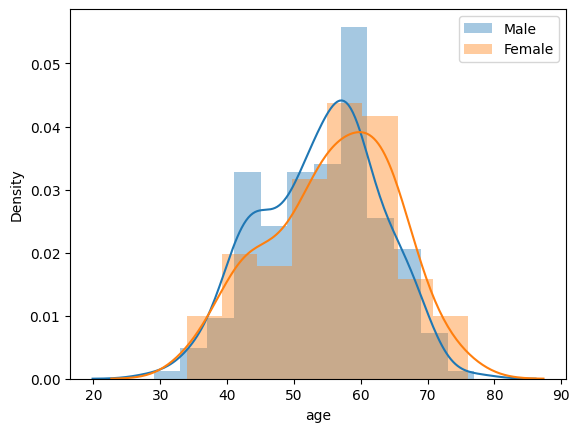

In [20]:
sns.distplot(df[df['sex']==1]['age'],label='Male')
sns.distplot(df[df['sex']==0]['age'],label='Female')
plt.legend()
plt.show()

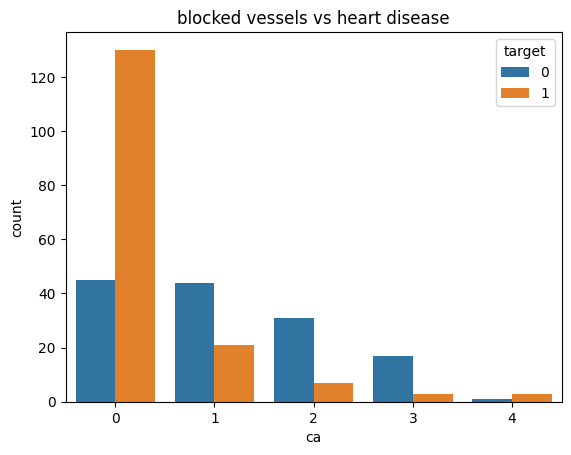

In [21]:
sns.countplot(x='ca',hue='target',data=df)
plt.title('blocked vessels vs heart disease')
plt.show()

### Model Building
* Supervised model building part -> Classification
* Divide the data into train and test set
* Create a model
* Train our model
* Test our model -> yPred -> Prediction
* Performance of the model -> Accuracy score, confusion matrix, classification report

In [22]:
x = df.iloc[:,:-1] # Independent variables or features
y = df['target'] # Dependent variable or feature

In [23]:
x.shape

(302, 13)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,train_size = 0.7)

In [26]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2


In [27]:
y_train

,target
124,1
72,1
15,1
10,1
163,1
...,...
189,0
71,1
106,1
271,0


In [28]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
yPred = model.predict(x_test)

In [30]:
yPred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1])

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
print('Confusion matrix')
print(confusion_matrix(y_test,yPred))

Confusion matrix
[[37  5]
 [10 39]]


In [33]:
print('Accuracy score')
print(accuracy_score(y_test,yPred))

Accuracy score
0.8351648351648352


In [34]:
print(classification_report(y_test,yPred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        42
           1       0.89      0.80      0.84        49

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.84      0.84      0.84        91



**Some important parameters of DT**

* Criterion -> By default (gini), entropy
* max_depth -> maximum depth of the tree -> default (none)
* min_sample_split
* min_sample_leaf

[Text(0.4765625, 0.9444444444444444, 'x[2] <= 0.5\ngini = 0.496\nsamples = 211\nvalue = [96.0, 115.0]'),
 Text(0.25, 0.8333333333333334, 'x[11] <= 0.5\ngini = 0.395\nsamples = 96\nvalue = [70, 26]'),
 Text(0.36328125, 0.8888888888888888, 'True  '),
 Text(0.16071428571428573, 0.7222222222222222, 'x[12] <= 2.5\ngini = 0.5\nsamples = 48\nvalue = [24, 24]'),
 Text(0.08928571428571429, 0.6111111111111112, 'x[8] <= 0.5\ngini = 0.384\nsamples = 27\nvalue = [7, 20]'),
 Text(0.03571428571428571, 0.5, 'x[4] <= 316.5\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(0.017857142857142856, 0.3888888888888889, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.05357142857142857, 0.3888888888888889, 'x[4] <= 362.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.03571428571428571, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07142857142857142, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.14285714285714285, 0.5, 'x[10] <= 1.5\ngini = 0.48

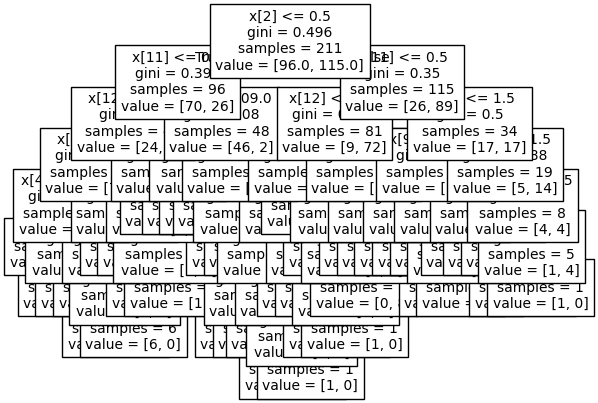

In [35]:
from sklearn import tree
tree.plot_tree(model,fontsize = 10)